In [1]:
import lec
import xarray
import numpy as np

vmecOutput = "./../testField/wout_QAS.nc" 
surf = lec.Surface.readVMECOutput(vmecOutput)
iota = float(xarray.open_dataset(vmecOutput)["iotas"].values[-1])

In [2]:
eqQAS= lec.SurfaceEquilibrium(surf=surf, iota=iota)
eqQAS.run()

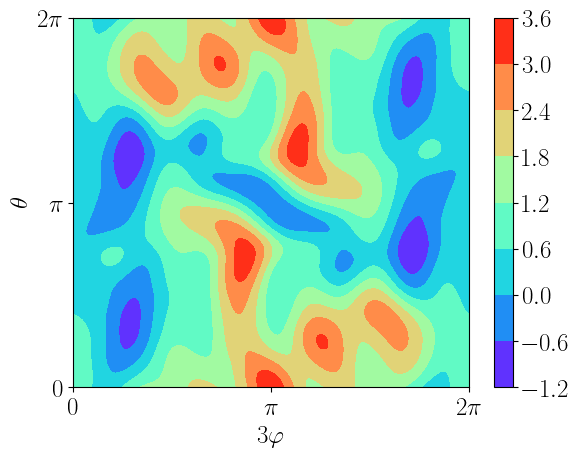

In [3]:
import matplotlib
matplotlib.rcParams['text.usetex'] = True
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
eqQAS.Jacobian.plot_plt(ax=ax, fig=fig)